## Лабораторная  работа  №2. Исследование  факторов  и организация работы с таблицами данных


Данные: data_purch.xlsx

#### Загрузка пакетов

In [26]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [27]:
data = pd.read_excel(r'C:\Users\user\term 2\data_purch.xlsx')
data.columns

Index(['first_pub_date', 'final_protocol_pub_date', 'purchase_number',
       'collecting_start_date', 'collecting_end_date', 'placing_base_name',
       'cust_reg', 'lot_price_correct', 'drug_mnn_ext_code', 'drug_mnn_name',
       'drug_qty', 'drug_price', 'drug_position_price', 'ftg', 'is_abnd',
       'is_znvlp', 'is_narcotic', 'is_msp_purchase', 'is_povt', 'is_dif',
       'app_amount_absolute_correct', 'advance_sum_correct'],
      dtype='object')

######  Описание данных

* first_pub_date – дата публикации процедуры
* final_protocol_pub_date – дата завершения процедуры
* purchase_number – идентификатор процедуры
* collecting_start_date – дата начала сбора заявок от потенциальных поставщиков
* collecting_end_date – дата окончания сбора заявок от потенциальных поставщиков
* placing_base_name – форма проведения торгов (конкурс, аукцион и т.п.)
* cust_reg – регион заказчика процедуры
* lot_price_correct – максимально возможная, объявленная заказчиком, цена за все препараты в закупке
* drug_mnn_ext_code – идентификатор лекарственного препарата
* drug_mnn_name – наименование лекарственного препарата (их меньше, чем drug_mnn_ext_code)
* drug_qty – объем закупаемого лекарственного препарата
* drug_price – цена за единицу объема закупаемого лекарственного препарата
* drug_position_price – цена за всю позицию закупаемого лекарственного препарата
* ftg – класс закупаемого лекарственного препарата
* is_abnd – фиктивная переменная: 1 – закупка не состоялась, 0 – состоялась
* is_znvlp – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат из списка ЖВЛП, 0 – не содержатся
* is_narcotic – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, в составе которого есть наркотические вещества, 0 – не содержатся
* is_msp_purchase – фиктивная переменная: 1 – закупка предназначена только для субъектов малого и среднего предпринимательства, 0 – не предназначена
* is_povt – фиктивная переменная: 1 – эту процедуру заказчик вынужден повторить, 0 – не повторная
* is_dif – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, являющийся дефицитным, 0 – не содержатся
* app_amount_absolute_correct – сумма залога
* advance_sum_correct – сумма аванса

In [123]:
data

,first_pub_date,final_protocol_pub_date,purchase_number,collecting_start_date,collecting_end_date,placing_base_name,cust_reg,lot_price_correct,drug_mnn_ext_code,drug_mnn_name,...,ftg,is_abnd,is_znvlp,is_narcotic,is_msp_purchase,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct,avg_lot_price_per_bidder
0,2021-03-30,2021-04-12,AA0000001,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,56040.00,5d6d137c-75b7-11ea-b5ac-1b70cb6e9621,ИНТЕРФЕРОН АЛЬФА-2B,...,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0,56040.00
1,2021-03-30,2021-04-12,AB0000002,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,57720.00,5d6e26f4-75b7-11ea-b5ac-3b4e2912a2c3,ИНТЕРФЕРОН АЛЬФА-2B,...,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0,57720.00
2,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb1f40-bf5b-11e9-bd5d-c33c05f32457,БУДЕСОНИД,...,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0,931426.86
3,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb3a20-bf5b-11e9-bd5d-07a90f4fd9f6,БУДЕСОНИД+ФОРМОТЕРОЛ,...,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0,931426.86
4,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb168a-bf5b-11e9-bd5d-5725ca76550a,МОКСОНИДИН,...,Препараты гипотензивные,0,1,0,0,0,0,0.0,0.0,931426.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556307,2021-07-27,2021-08-06,AB0166842,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,221775.00,1ed99ddc-bf5b-11e9-bd5d-d70987c26fdc,ЖЕЛЕЗА [III] ГИДРОКСИД САХАРОЗНЫЙ КОМПЛЕКС,...,Препараты антианемические,0,1,0,0,0,0,0.0,0.0,221775.00
556308,2021-07-27,2021-08-05,AD0166843,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,27163.50,1ee4a07e-bf5b-11e9-bd5d-f377aa802c38,МЕТИОНИЛ-ГЛУТАМИЛ-ГИСТИДИЛ-ФЕНИЛАЛАНИЛ-ПРОЛИЛ-...,...,Психоаналептики,1,1,0,0,1,0,0.0,0.0,27163.50
556309,2021-07-27,2021-08-05,AX0166844,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,81400.00,1edbbc5c-bf5b-11e9-bd5d-2357606213ac,ПИПЕКУРОНИЯ БРОМИД,...,Миорелаксанты,1,1,0,0,1,0,0.0,0.0,81400.00
556310,2021-07-27,2021-08-05,BZ0166845,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,13475.00,1edc2494-bf5b-11e9-bd5d-27d8cd2613fd,СУКСАМЕТОНИЯ ХЛОРИД,...,Миорелаксанты,1,1,0,0,1,0,0.0,0.0,13475.00


In [124]:
# вывод типов данных
data.dtypes

first_pub_date                 datetime64[ns]
final_protocol_pub_date        datetime64[ns]
purchase_number                        object
collecting_start_date          datetime64[ns]
collecting_end_date            datetime64[ns]
placing_base_name                      object
cust_reg                               object
lot_price_correct                     float64
drug_mnn_ext_code                      object
drug_mnn_name                          object
drug_qty                              float64
drug_price                            float64
drug_position_price                   float64
ftg                                    object
is_abnd                                 int64
is_znvlp                                int64
is_narcotic                             int64
is_msp_purchase                         int64
is_povt                                 int64
is_dif                                  int64
app_amount_absolute_correct           float64
advance_sum_correct               

In [125]:
# проверим на пропуски
data.isnull().any()

first_pub_date                 False
final_protocol_pub_date        False
purchase_number                False
collecting_start_date          False
collecting_end_date            False
placing_base_name              False
cust_reg                       False
lot_price_correct              False
drug_mnn_ext_code              False
drug_mnn_name                  False
drug_qty                        True
drug_price                     False
drug_position_price             True
ftg                            False
is_abnd                        False
is_znvlp                       False
is_narcotic                    False
is_msp_purchase                False
is_povt                        False
is_dif                         False
app_amount_absolute_correct    False
advance_sum_correct            False
avg_lot_price_per_bidder       False
dtype: bool

Я считаю, что наибольшее влияние на вероятность незакрытия закупки оказывают следующие факторы:

* placing_base_name – форма проведения торгов (конкурс, аукцион и т.п.). Чем выше цена, тем меньше вероятность того, что найдется поставщик, готовый выполнить заказ по данной цене.

* drug_price – цена за единицу объема закупаемого лекарственного препарата. Чем выше цена, тем меньше вероятность того, что найдется поставщик, готовый выполнить заказ по данной цене.

* is_abnd - фиктивная переменная, которая указывает, состоялась ли закупка или нет. Если закупка не состоялась в прошлый раз, то это может повлиять на вероятность незакрытия закупки в будущем.

* is_povt - фиктивная переменная, которая указывает, повторная ли это процедура. Если это повторная процедура, то это может указывать на то, что заказчик не смог найти поставщика в первый раз, что может повлиять на вероятность незакрытия закупки.

* advance_sum_correct – сумма аванса. Чем выше сумма аванса, и тем меньше вероятность, что покупатель будет брать продукт.

#### Группировка

In [126]:
grouped_data = data.groupby('purchase_number').agg({
    'lot_price_correct': 'sum',
    'advance_sum_correct': 'sum',
    'is_abnd': 'max',
    'drug_price': 'sum',
    'drug_position_price': 'sum',
})

In [127]:
grouped_data

,lot_price_correct,advance_sum_correct,is_abnd,drug_price,drug_position_price
purchase_number,,,,,
AA0000001,56040.00,0.0,0,28.0200,56040.00
AA0000006,9960262.00,0.0,0,44.8300,383087.00
AA0000011,2788023.75,0.0,1,109.8900,185868.25
AA0000016,4888341.00,0.0,0,120.4300,162944.70
AA0000021,261544.68,0.0,0,39.9012,130772.34
...,...,...,...,...,...
BZ0166825,768000.00,0.0,0,4.2000,384000.00
BZ0166830,56835.00,0.0,0,4.2100,56835.00
BZ0166835,11880.00,0.0,1,3.9600,11880.00


### Формирование факторов
###### Фактор, полученный с помощью метода главных компонент:
Фактор `outcome` - это фактор, полученный с помощью метода главных компонент из исходных столбцов с информацией о покупках. Этот фактор является линейной комбинацией исходных факторов, которые наилучшим образом объясняют вариацию в данных.
###### Факторы, полученные с помощью замен и арифметических операций:
* Фактор `all_drug` - это фактор, который представляет количество препоратов в закупке. Вычисляется как отношение цены за всю позицию закупаемого лекарственного препарата к цена за единицу объема закупаемого лекарственного препарата.
* Фактор `rem_lot_price_correct` - остаток путем вычетааванса от максимально возможной, объявленной заказчиком, цены за все препараты в закупке. Более высокая стоимость может сигнализировать о более высоком спросе на товар.

In [128]:
grouped_data

,lot_price_correct,advance_sum_correct,is_abnd,drug_price,drug_position_price
purchase_number,,,,,
AA0000001,56040.00,0.0,0,28.0200,56040.00
AA0000006,9960262.00,0.0,0,44.8300,383087.00
AA0000011,2788023.75,0.0,1,109.8900,185868.25
AA0000016,4888341.00,0.0,0,120.4300,162944.70
AA0000021,261544.68,0.0,0,39.9012,130772.34
...,...,...,...,...,...
BZ0166825,768000.00,0.0,0,4.2000,384000.00
BZ0166830,56835.00,0.0,0,4.2100,56835.00
BZ0166835,11880.00,0.0,1,3.9600,11880.00


In [129]:
grouped_data.dtypes

lot_price_correct      float64
advance_sum_correct    float64
is_abnd                  int64
drug_price             float64
drug_position_price    float64
dtype: object

In [130]:
pca = PCA(n_components=1)
new_feature = pca.fit_transform(grouped_data)
grouped_data['new_feature'] = new_feature

In [131]:
# создаем новые факторы
grouped_data['all_drug'] = grouped_data['drug_position_price'] / grouped_data['drug_price']
grouped_data['rem_lot_price_correct'] = grouped_data['lot_price_correct'] - grouped_data['advance_sum_correct'] 

In [133]:
grouped_data.rem_lot_price_correct

purchase_number
AA0000001      56040.00
AA0000006    9960262.00
AA0000011    2788023.75
AA0000016    4888341.00
AA0000021     261544.68
                ...    
BZ0166825     768000.00
BZ0166830      56835.00
BZ0166835      11880.00
BZ0166840     374208.00
BZ0166845      13475.00
Name: rem_lot_price_correct, Length: 166846, dtype: float64

In [134]:
grouped_data.dtypes

lot_price_correct        float64
advance_sum_correct      float64
is_abnd                    int64
drug_price               float64
drug_position_price      float64
new_feature              float64
all_drug                 float64
rem_lot_price_correct    float64
dtype: object

### Разделяем на обучающую и тестовую выборки

In [135]:
grouped_data.dropna(subset=['is_abnd'], inplace=True)
# Выделение случайной выборки размера n
n = 64000
sample = grouped_data.sample(n)

# Разделение выборки на обучающую и тестовую
test_size = 0.2 # 20% тестовая выборка
train, test = train_test_split(sample, test_size=test_size, random_state=42)

# Проверка размеров выборок
print(f"Размер обучающей выборки: {train.shape[0]}")
print(f"Размер тестовой выборки: {test.shape[0]}")

# Разделение выборки на признаки и целевую переменную
X_train, X_test = train.drop('is_abnd', axis=1), test.drop('is_abnd', axis=1)
y_train, y_test = train['is_abnd'], test['is_abnd']

Размер обучающей выборки: 51200
Размер тестовой выборки: 12800


In [136]:
X_train.describe()

,lot_price_correct,advance_sum_correct,drug_price,drug_position_price,new_feature,all_drug,rem_lot_price_correct
count,5.120000e+04,51200.0,5.120000e+04,5.120000e+04,5.120000e+04,5.120000e+04,5.120000e+04
mean,4.059076e+06,0.0,4.245830e+03,1.781713e+06,1.077535e+05,2.602616e+06,4.059076e+06
std,4.725702e+07,0.0,2.799968e+05,1.625326e+07,4.811699e+07,4.420202e+08,4.725702e+07
min,8.280000e+01,0.0,3.410000e-06,0.000000e+00,-4.184547e+06,0.000000e+00,8.280000e+01
25%,7.377270e+04,0.0,5.140000e+00,5.510825e+04,-4.101186e+06,1.150436e+03,7.377270e+04
50%,3.510600e+05,0.0,2.749000e+01,2.054787e+05,-3.794032e+06,5.797660e+03,3.510600e+05
75%,1.620094e+06,0.0,1.313632e+02,6.776621e+05,-2.429655e+06,3.750000e+04,1.620094e+06
max,5.626028e+09,0.0,6.000000e+07,1.117701e+09,5.562066e+09,1.000000e+11,5.626028e+09


In [137]:
X_train = X_train.fillna(X_train.mean())

### Оценка важности выделенных факторов на основе метода "Случайного леса"

                 feature  importance
3    drug_position_price    0.283422
2             drug_price    0.270663
5               all_drug    0.157195
4            new_feature    0.100362
6  rem_lot_price_correct    0.094675
0      lot_price_correct    0.093683
1    advance_sum_correct    0.000000


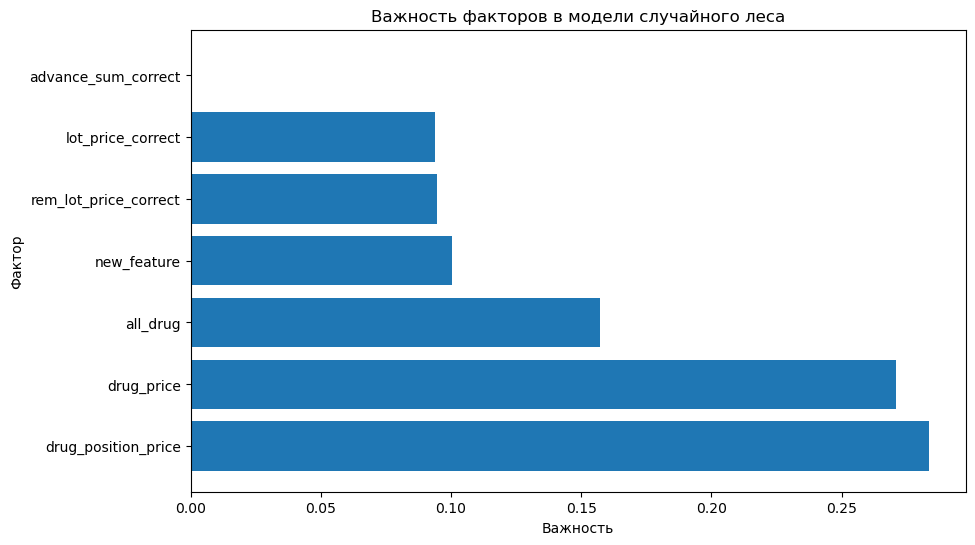

Наиболее важные факторы: ['drug_position_price', 'drug_price', 'all_drug', 'new_feature', 'rem_lot_price_correct']


In [138]:
#Создание модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=16)

#Обучение модели на обучающей выборке
rf.fit(X_train, y_train)

#Получение важности факторов
importances = rf.feature_importances_

#Сохранение важности факторов в датафрейм и сортировка по убыванию
df_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values('importance', ascending=False)

#Вывод 10 наиболее важных факторов
print(df_importances.head(10))

#Построение графика важности факторов
plt.figure(figsize=(10,6))
plt.barh(df_importances['feature'], df_importances['importance'])
plt.xlabel('Важность')
plt.ylabel('Фактор')
plt.title('Важность факторов в модели случайного леса')
plt.show()

#Вывод наиболее важных факторов
top_factors = df_importances.head(5)['feature'].values.tolist()
print(f"Наиболее важные факторы: {top_factors}")

In [141]:
X_test.describe()

,lot_price_correct,advance_sum_correct,drug_price,drug_position_price,new_feature,all_drug,rem_lot_price_correct
count,1.280000e+04,12800.000000,1.280000e+04,1.280000e+04,1.280000e+04,1.279900e+04,1.280000e+04
mean,4.039192e+06,8.184037,4.167404e+03,1.865031e+06,1.014979e+05,5.197967e+05,4.039184e+06
std,5.219777e+07,925.918058,1.643295e+05,1.930822e+07,5.411457e+07,4.470815e+06,5.219777e+07
min,6.800000e+01,0.000000,0.000000e+00,0.000000e+00,-4.184564e+06,0.000000e+00,6.800000e+01
25%,6.899800e+04,0.000000,4.900000e+00,5.239275e+04,-4.106718e+06,1.200000e+03,6.899800e+04
50%,3.360000e+05,0.000000,2.599000e+01,1.966500e+05,-3.811699e+06,5.760000e+03,3.360000e+05
75%,1.599673e+06,0.000000,1.300175e+02,6.680408e+05,-2.453410e+06,3.645513e+04,1.599673e+06
max,4.294685e+09,104755.670000,1.500000e+07,1.078451e+09,4.395499e+09,2.696304e+08,4.294685e+09


In [147]:
X_test = np.nan_to_num(X_test)

### Построение модели логистической регрессии

In [148]:
#Создание модели логистической регрессии и обучение ее на обучающей выборке
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Предсказание на обучающей и тестовой выборках
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

#Оценка точности на обучающей и тестовой выборках
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Точность модели на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность модели на тестовой выборке: {test_accuracy:.4f}")

Точность модели на обучающей выборке: 0.5048
Точность модели на тестовой выборке: 0.5023


C:\Users\user\anaconda3\envs\natashaevv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Данные результаты говорят о том, что точность модели на тестовой выборке не сильно отличается от точности на обучающей выборке. Однако, точность модели на обеих выборках достаточно низкая (50.48% на обучающей выборке и 50.23% на тестовой выборке), что может указывать на то, что модель не обладает высокой способностью к обобщению на новые данные.